# **Car price prediction**

In [1]:
# STEP 0: import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#apis
from sklearn.impute import SimpleImputer
#modules

from sklearn.preprocessing import StandardScaler

#normal lib
from statistics import mean
import joblib
import seaborn as sns
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# **STEP 1. LOOK AT THE BIG PICTURE**


The demand for cars in the world today is very high which leads to car prices being varied significantly. Car prices are influenced by different factors ranging from the model, type of the vehicle and external market condition. For example: fuel efficiency, performance and brands play an inportant role in pricing. Besides that, factors such as mordern technology, safety features and manufacturer warranties usually make the car more expensive. On the other hand, used cars can be consider to be more affordable to users based on mileage, market demand and condition. In general, car prices are determined by technological advancements, user requirments, trends and other economic factors. 

From the dataset, car prices are pridicted from 16 features: `Levy`, `Manufacturer`, `Model`, `Production Year`, `Category`, `Leather interior`, `Fuel type`, `Engine Volume`, `Mileage`, `Cylinders`, `Gear box type`, `drive wheels`, `doors`, `wheel`, `colors` and `air bag`. 

# **Step 2. GET THE DATA**


The dataset named “Car Price Prediction Challenge” and this is the link: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data 

  

In [2]:
raw_data = pd.read_csv(r'car_price_prediction.csv')

# **Step 3. Data analyse**

During the process of analyzing the dataset, there are attributes include incorrect values which leads to the accuracy of the output, which explains that reformating some data is essential. 

The dataset contains 19,237 rows (sample) and 18 columns (attribute). The attributes data include: Categorical Data, which are Normal and Ordinal Data; and Numerical Data, which are 
Discrete Data and Continuous Data. 

**Categorical data (13):** Levy, Manufacturer, Model, Category, Leather Interior, Fuel type, Engine volume, Mileage, Gear box type, Drive wheels, Doors, Wheel and Color 

**Numerical data (5):** ID, Price, Prod. year, Cylinders, Airbags 

## 3.1.1. Data Cleanup

**Missing value, blank space**
The objective is the define any missing value throughout the dataset. The ‘isnull()’ function, which evaluates each cell in the dataset to determine whether it contains a missing value, represented as ‘NaN’ (Not a Number). The final output displays the total number of missing values for each column in the dataset. At this stage, there are no missing value.  

In [3]:
#data cleanup
print("Null values: ")
print(raw_data.isnull().sum())

Null values: 
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


**Duplicate rows:**
We erase the duplicate rows, which may cause bias to the training process.

To know whether there are missing values, duplicated() is used to detect data that appears more then one time.


In [4]:
#duplicate rows
print("Duplicate rows: ")

duplicate_rows = raw_data[raw_data.duplicated()]
print(duplicate_rows)

Duplicate rows: 
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG   

Consequently, there are 313 rows of dupliated data exist. The cell below is used to drop those duplicates.

In [5]:
# Remove duplicate rows
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

**For ‘ID’ attribute:**

Data value in ‘ID’ column presents a unique identifier for each car in the dataset. Although it represents different car types, brands and models, it is not useful for analysis and data prediction because it is just a string of numbers and perform no specific or definite connection to other varibles.  

It does not contribute any aspects about the characteristics of the car nor the prediction of the price of the car. Therefore, it should be removed because it is unnecessary and does not affect the connection between other varibles and avoid overfitting in model prediction. 

  

Overall: 

- Mileage: is processed to presents only numbers (e.g., 200000 instead of 200000km) 

- Engine volume: processed to presents only engine size in numerical data (e.g., 2.5) and column Turbo is added to with only ‘Yes’ or ‘No’ feature. 

- Levy: Replace all missing values with 0, which is fully numeric 

- Doors: Data presents only numeric value (number of doors) (e.g.,  2, 3, 4, 5) 

- ID: Removed as unnecessary 

In [6]:
#drop the ID column
raw_data = raw_data.drop(columns = "ID")

**For ‘Levy’ attribute:** 

As mention before, the dataset doesn’t include any missing values. However, in the ‘Levy’ column, we discovered that the symbol ‘ – ‘presents missing value. This is a critical issue that requires resolution because car prices increase based on taxes such as environmental charges, luxury taxes and excise duties. These costs are mostly passed on car owners, which leads to increasing in car price, especially imported or high- emission vehicles. 

  

To solve this issue, we use function ‘replace (‘- ‘, 0)’ to replace any dash (which means missing value) into 0.  Then, the ‘pd.to_numeric ()’ function is applied to convert the whole column into numerical data value. 

The ‘Levy’ attribute is performed in fully numeric, more clear and easier for data and statistical analysis. 

In [7]:
# set the missing value as 0, and change a whole column to numeric data
raw_data['Levy'] = raw_data['Levy'].replace('-', 0) # set into mean when cell = 0
raw_data['Levy'] = pd.to_numeric(raw_data['Levy'])

**Impute:**

In [8]:
# impute the missing value, fix them by knn methods
from sklearn.impute import KNNImputer

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
raw_data['Levy'] = impute.fit_transform(raw_data['Levy'].values.reshape(-1,1))
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

**For ‘Doors’ attribute:** 

In the dataset, the ‘Doors’ column presents the number of doors in each vehicle. However, there are errors in the data values.  

We use ‘str.replace’ to replace any of the unreasonable values into the correct one: 
- Replace ‘May’ with ‘5’ 
- Replace ‘Mar’ with ‘3’ 
- Replace ‘04’ with ‘4’ 
- Replace ‘02’ with ‘2’ 

This step ensures that all values appear in the ‘Doors’ column with present as numerical data. For example, if the cars have ‘Mar’ number of doors, it is corrected to ‘3’. 

We also set the 'Doors' attributes into category be cause the data is discrete from each other.

In [9]:
#production year to be a string (EDIT GENERAL)
raw_data['Doors'] = raw_data['Doors'].str.replace('May', '5')
raw_data['Doors'] = raw_data['Doors'].str.replace('Mar', '3')
raw_data['Doors'] = raw_data['Doors'].str.replace('04', '4')
raw_data['Doors'] = raw_data['Doors'].str.replace('02', '2')

#convert the doors features to category features
raw_data['Doors'] = raw_data['Doors'].astype('category')

**For ‘Engine volume’ attribute:** 

There are two types of value appear in this column: engines with Turbo and engines without Turbo. Turbo engines have smaller size compared to the non-turbo engines for the same output power. Besides that, Turbo engines force more air into the combustion chamber, resulting in higher power and torque compared to a (non-turbo) engine.  Moreover, engines with turbo results in higher acceleration and fuel efficiency but required higher complex machine operation and maintenance. 

In [10]:
# extracting the enginer volume
raw_data['Turbo'] = raw_data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
raw_data['Turbo'] = raw_data['Turbo'].map({1: 'Yes', 0: 'No'})

raw_data['Engine volume'] = raw_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

Non-turbo engine (Naturally aspirated engines) has simple design, lower upfront and long-term costs and produces less power overall. 

  

Create a new column named “Turbo” and checks if the word 'Turbo' appears in the 'Engine volume' column. If it does, set the value to 1 otherwise it is set to 0. The function ‘.map()’ then convert value ‘1’ and ‘0’ into ‘Yes’ and ‘No’. After that, it extract engine volume numerical value and convert into floating-point number. 

  

A new column ‘Turbo’ is created, indicating whether the care design has a turbo engine (Yes) or naturally aspirated engine (No). The ‘Engine volume’ is now only contain the engine size as numerical value and clear any other non-numeric value (Turbo). 

**For ‘Mileage’ attribute:** 

The data values such as 100000km or 200000km so we use the expression \d+, which looks for one or more digits. It then converts those extracted values into integers, removes any non-numeric characters like “km”. This will made those values become Continuous Data (Numerical Data) so that the next analysis step can give accurate results. 

In [11]:
#reformat data
#cleaning the mileague
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+)').astype(float)

**Converting the data:**

To make the feature easier to inspect and to measure the age of each car, we convert the production year to age, by taking current year, subtracted to the production year. 

In [12]:
# convert the prod. year features to age
raw_data['Age'] = 2024 - raw_data['Prod. year']

# Assuming raw_data is your DataFrame
raw_data = raw_data.drop(columns=['Prod. year'])

**Inspect the data after modification**

The table illustrates the Count value, Mean, Std (Standard Deviation), Min/Max, Quartiles 

For example: 

- ‘Price’ Attribute analysis with value 

- Count (18924): number of cars have the listed price 

- Mean (18,587.44): The average price of the cars among the dataset 

- Std (192,135): This is an ‘alarming value’ for the price difference between vehicles. It shows that the dataset include extreme values (some cars are much more expensive compared to the rest) 

- Min/Max: There is a huge gap in the car price, indicates the difference between the luxury car brands and the normal one 

- Quartiles (13,172): 25% of the cars in total is less than 5,331 and 75% is less than 22,063

In [13]:
#inspect the data after modification
print("Head: ")
print(raw_data.head())
print("Data insight: ")
raw_data.describe()

Head: 
   Price    Levy Manufacturer    Model   Category Leather interior Fuel type  \
0  13328  1399.0        LEXUS   RX 450       Jeep              Yes    Hybrid   
1  16621  1018.0    CHEVROLET  Equinox       Jeep               No    Petrol   
2   8467     0.0        HONDA      FIT  Hatchback               No    Petrol   
3   3607   862.0         FORD   Escape       Jeep              Yes    Hybrid   
4  11726   446.0        HONDA      FIT  Hatchback              Yes    Petrol   

   Engine volume   Mileage  Cylinders Gear box type Drive wheels Doors  \
0            3.5  186005.0        6.0     Automatic          4x4   4-5   
1            3.0  192000.0        6.0     Tiptronic          4x4   4-5   
2            1.3  200000.0        4.0      Variator        Front   4-5   
3            2.5  168966.0        4.0     Automatic          4x4   4-5   
4            1.3   91901.0        4.0     Automatic        Front   4-5   

              Wheel   Color  Airbags Turbo  Age  
0        Left whe

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
count,1.892400e+04,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2.306251,1.555373e+06,4.580216,6.568379,13.085764
std,1.921356e+05,568.273736,0.877591,4.880221e+07,1.200223,4.322323,5.665749
min,1.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,5.331000e+03,0.000000,1.800000,7.019575e+04,4.000000,4.000000,9.000000
50%,1.317200e+04,642.000000,2.000000,1.264000e+05,4.000000,6.000000,12.000000
75%,2.206300e+04,917.000000,2.500000,1.891198e+05,4.000000,12.000000,15.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,16.000000,85.000000


**Numerical and Categorical features:**

To present data as Numerical features and Categorical features, we retrieves all numerical columns from the dataset and extracts these columns  named ‘num_cols’. For categorical data types, subtracting all the stored numerical column from total column, which results in categorical column. It is clearly to analyze the structure in addition to data features. 

In [14]:
cols=raw_data.columns
num_cols = raw_data._get_numeric_data()
num_cols= list(num_cols.columns)
cat_cols = list(set(cols) - set(num_cols))
cat_cols.sort()

print(f"Numerical features: {num_cols}")
print(f"Categorical features: {cat_cols}")


Numerical features: ['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']
Categorical features: ['Category', 'Color', 'Doors', 'Drive wheels', 'Fuel type', 'Gear box type', 'Leather interior', 'Manufacturer', 'Model', 'Turbo', 'Wheel']


**Cylinders:**

Car’s cylinders are important components during the operation process; it is where fuel combustion occurs. The pistons move up and down and convert energy from the combustion into mechanical power. The number of cylinders dirrectly affect the output power and fuel efficiency.  

Demonstrate the frequency count of each unique value is helpful to identify the distribution of this varible (Number of cars with specific number of cylinders) 

In [15]:
print(raw_data['Cylinders'].value_counts()) 

Cylinders
4.0     14159
6.0      3373
8.0       976
5.0       169
3.0       107
2.0        42
12.0       38
1.0        37
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64


**Histogram analysis of numerical attributes:**

- Price: The distribution is skew to the left, which explains that most cars in the dataset have lower price compared to the others 

- Levy: The distribution is strongly skew to the left, indicates that many cars have low and either no levy value. This is also related to the dataset errors as some missing values appear as symbol ‘- ‘. Besides that, there also extreme values for luxury cars. 

- Age: The distribution is significantly skew to the left as cars that produced before 1980 tend to be less purchase compared to cars that produced after 2000, which result in car with younger age is more likely to be placed on market.

- Engine Volume: The distribution indicates that most car engine volumn has the at small to average size (around 5 liters). Only a few number of cars has less or over 5 liters in engine volume, this is also explain why Sedan models are purchased in high quantities.  

- Mileage: This is the only attributes that has a relatively even distribution over all values. The number of cars with odo from 10000km to 13000km occupy the largest value, follow by 5000km to 8000km and 15000km to 20000km with the value around 1800 variables. 

- Cylinders: The distribution indicates that the engine volume size attribute is proportional to the number of cylinders. Most cars have 4 to 6 cylinders and only a few include 12 to 16. 

- Airbags: The graph distribution is relative to cars model, which can be considered that there are 2 variables with peak value: one for cars with 2 to 6 airbags (Sedan) and cars with more than 12 airbags. 

Overall, the histograms point out a significant number of skewness among the attributes in the dataset due to missing values, errors, extreme values, etc. However, the main purpose is to be able to visualize, analyze and evaluate unreasonable parts to be able to process data and ultilize the solution methods. 

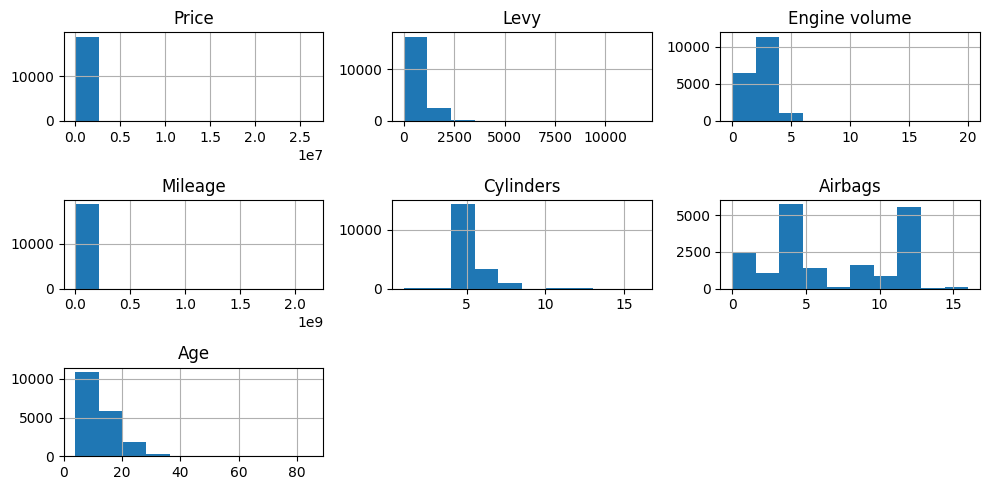

In [16]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

**Scatter plot**

Scatter matrix plot supports data analytics to visualize and compare relationship between numerical variables. Each plot in the matrix presents the corelation between two specific variables. By applying this method, it is easier to detect trends, outliers, and correlation such as positive correlation, negative correlation and no correlation. 

In this step, we import the scatter matrix from ‘pandas.plotting’ function to create a grid of scatter plots of each pair of the numerical values with visualization to present the relationship. The figure size is 12 in width and 8 in length to make the sketch more clearly and readable. ‘plt.tight_layout ()’ function is also used to make sure the matrix is clear without overlapping. 

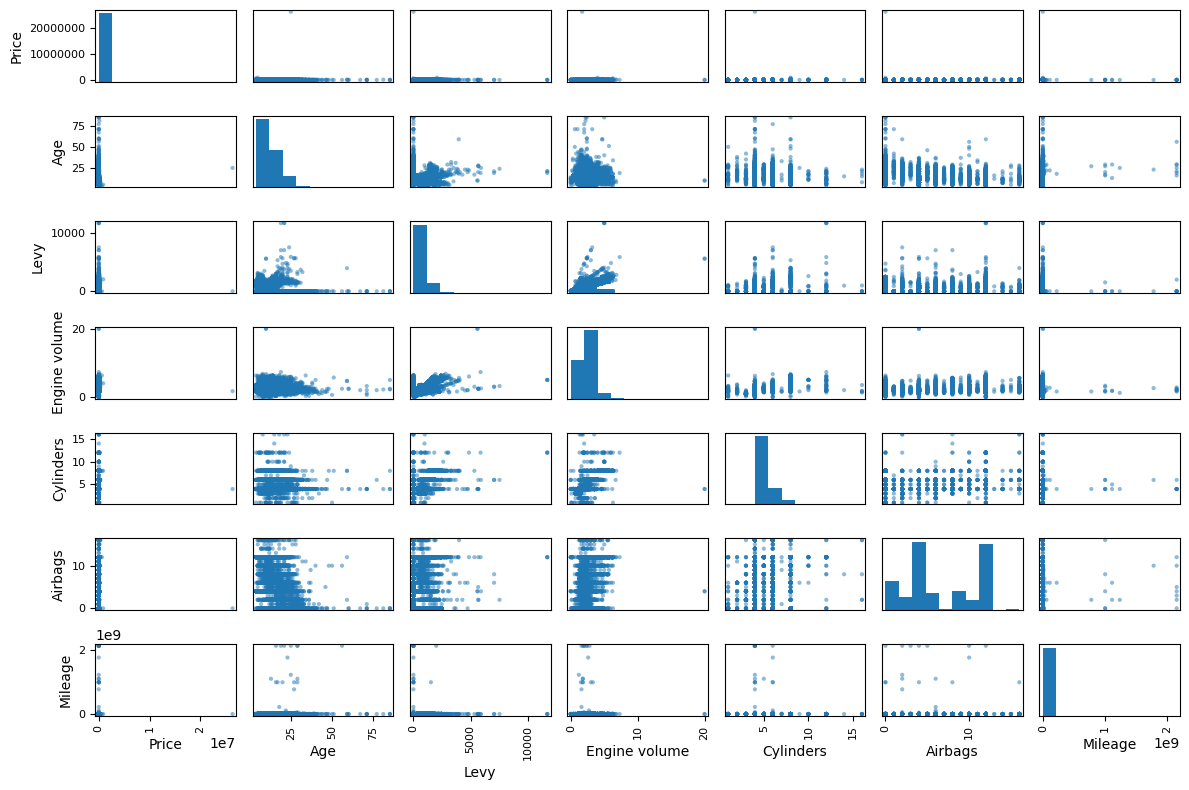

In [17]:
from pandas.plotting import scatter_matrix
def scatter(raw_data):
	attributes = ['Price', 'Age', 'Levy', 'Engine volume', 'Cylinders', 'Airbags', 'Mileage']
	scatter_matrix(raw_data[attributes], figsize=(12, 8))
	plt.tight_layout()
	plt.show()
scatter(raw_data)

In general, the scatter plot matrix illustrates the key features between numerical attributes. It also points out pairs of relationship that are unclear and imprecise and suggests the exist of complex correlation pairs that required adjustment 

- Engine volume vs Cylinder: The scatter plot presents strong linear relationship between these two features as higher engine volume required more cylinders. 

- Age vs Airbags: This is related to user safety aspects of vehicle operation, which explains that later production vehicles tend to have more airbags 

- Levy vs Engine Volume: The correlation of these two features indicates that bigger car with larger engine volume tend to pay more taxes or fees compared to smaller car. 

- Age vs Levy: younger-aged production cars tend to have higher levies. It is due to the fact that new and mordern are more expensive. 

- Levy vs Cylinder: The correlation between levy and cylinder is not strong. However, it reflects that the owners of bigger cars with strong engines often pay more taxes. 

- Age vs Engine Volume: The correlation is slightly low but it shows the current trend of vehicle development in the world. This is related to the auto industry, more fuel efficiency in modern cars. 

- Air bags vs Cylinder: Bigger cars required more space for cylinders operation, which explains the more air bags required for safety issue. 

- Engine Volume vs Air bag: Similar to Cylinder attribute, bigger cars are produced with larger engine volume for operation, which made these features proportional to each other 

**Correlation between numerical attributes before refining dataset:** 

Analyse data value Correlation before refining 

Correlation refers to a statistical measure that presents the degree and direction of a linear relationship between two variables. For “numeric to numeric” data values, in the range [-1, 1], where 0 implies no correlation, 1 implies the peak correlation(as one variable increases, the other increases) and -1 means inverse correlation (as one variable increases, the other decreases) 

In [18]:
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix)

                  Price      Levy  Engine volume   Mileage  Cylinders  \
Price          1.000000 -0.003558       0.008888 -0.001763   0.007435   
Levy          -0.003558  1.000000       0.378117 -0.021203   0.251632   
Engine volume  0.008888  0.378117       1.000000 -0.006292   0.777228   
Mileage       -0.001763 -0.021203      -0.006292  1.000000  -0.001720   
Cylinders      0.007435  0.251632       0.777228 -0.001720   1.000000   
Airbags       -0.012709  0.125015       0.221991 -0.009174   0.174112   
Age           -0.012689 -0.362827       0.032427  0.064058   0.099443   

                Airbags       Age  
Price         -0.012709 -0.012689  
Levy           0.125015 -0.362827  
Engine volume  0.221991  0.032427  
Mileage       -0.009174  0.064058  
Cylinders      0.174112  0.099443  
Airbags        1.000000 -0.235160  
Age           -0.235160  1.000000  


**Correlation matrix and heat map:**

The project objective is to develop a car prediction model with highest accuracy so the team decided to move the ‘Price’ column to the end, make it easier to focus on as the final result. 

The ‘loc’ function is applied to rearrange the column order in the correlation matrix. Pair of correlation values with higher value will be display on top while the lowest pair will be place at the bottom. 

To make data analysis easier and more visual, we use ‘seaborn (sns.heatmap)’ to create a graphical presentaion called ‘Heat map’. The heat map includes the following aspects with explaination: 

Annot = True: Correlation numerical values are displayed on the map for visualize 

cmap='coolwarm': This tool is applied to identify the consistent of correlation with warm colors presents positive correlation and cool colors present negative correlation. The increase in correlation is proportional to the increase in color intensity. 

Rotation: The y-axis remains horizontal while the x-axis rotates 90 degrees to complete the matrix. 

                  Price      Levy  Engine volume   Mileage  Cylinders  \
Price          1.000000 -0.003558       0.008888 -0.001763   0.007435   
Levy          -0.003558  1.000000       0.378117 -0.021203   0.251632   
Engine volume  0.008888  0.378117       1.000000 -0.006292   0.777228   
Mileage       -0.001763 -0.021203      -0.006292  1.000000  -0.001720   
Cylinders      0.007435  0.251632       0.777228 -0.001720   1.000000   
Airbags       -0.012709  0.125015       0.221991 -0.009174   0.174112   
Age           -0.012689 -0.362827       0.032427  0.064058   0.099443   

                Airbags       Age  
Price         -0.012709 -0.012689  
Levy           0.125015 -0.362827  
Engine volume  0.221991  0.032427  
Mileage       -0.009174  0.064058  
Cylinders      0.174112  0.099443  
Airbags        1.000000 -0.235160  
Age           -0.235160  1.000000  

 Price            1.000000
Engine volume    0.008888
Cylinders        0.007435
Mileage         -0.001763
Levy            -0.00

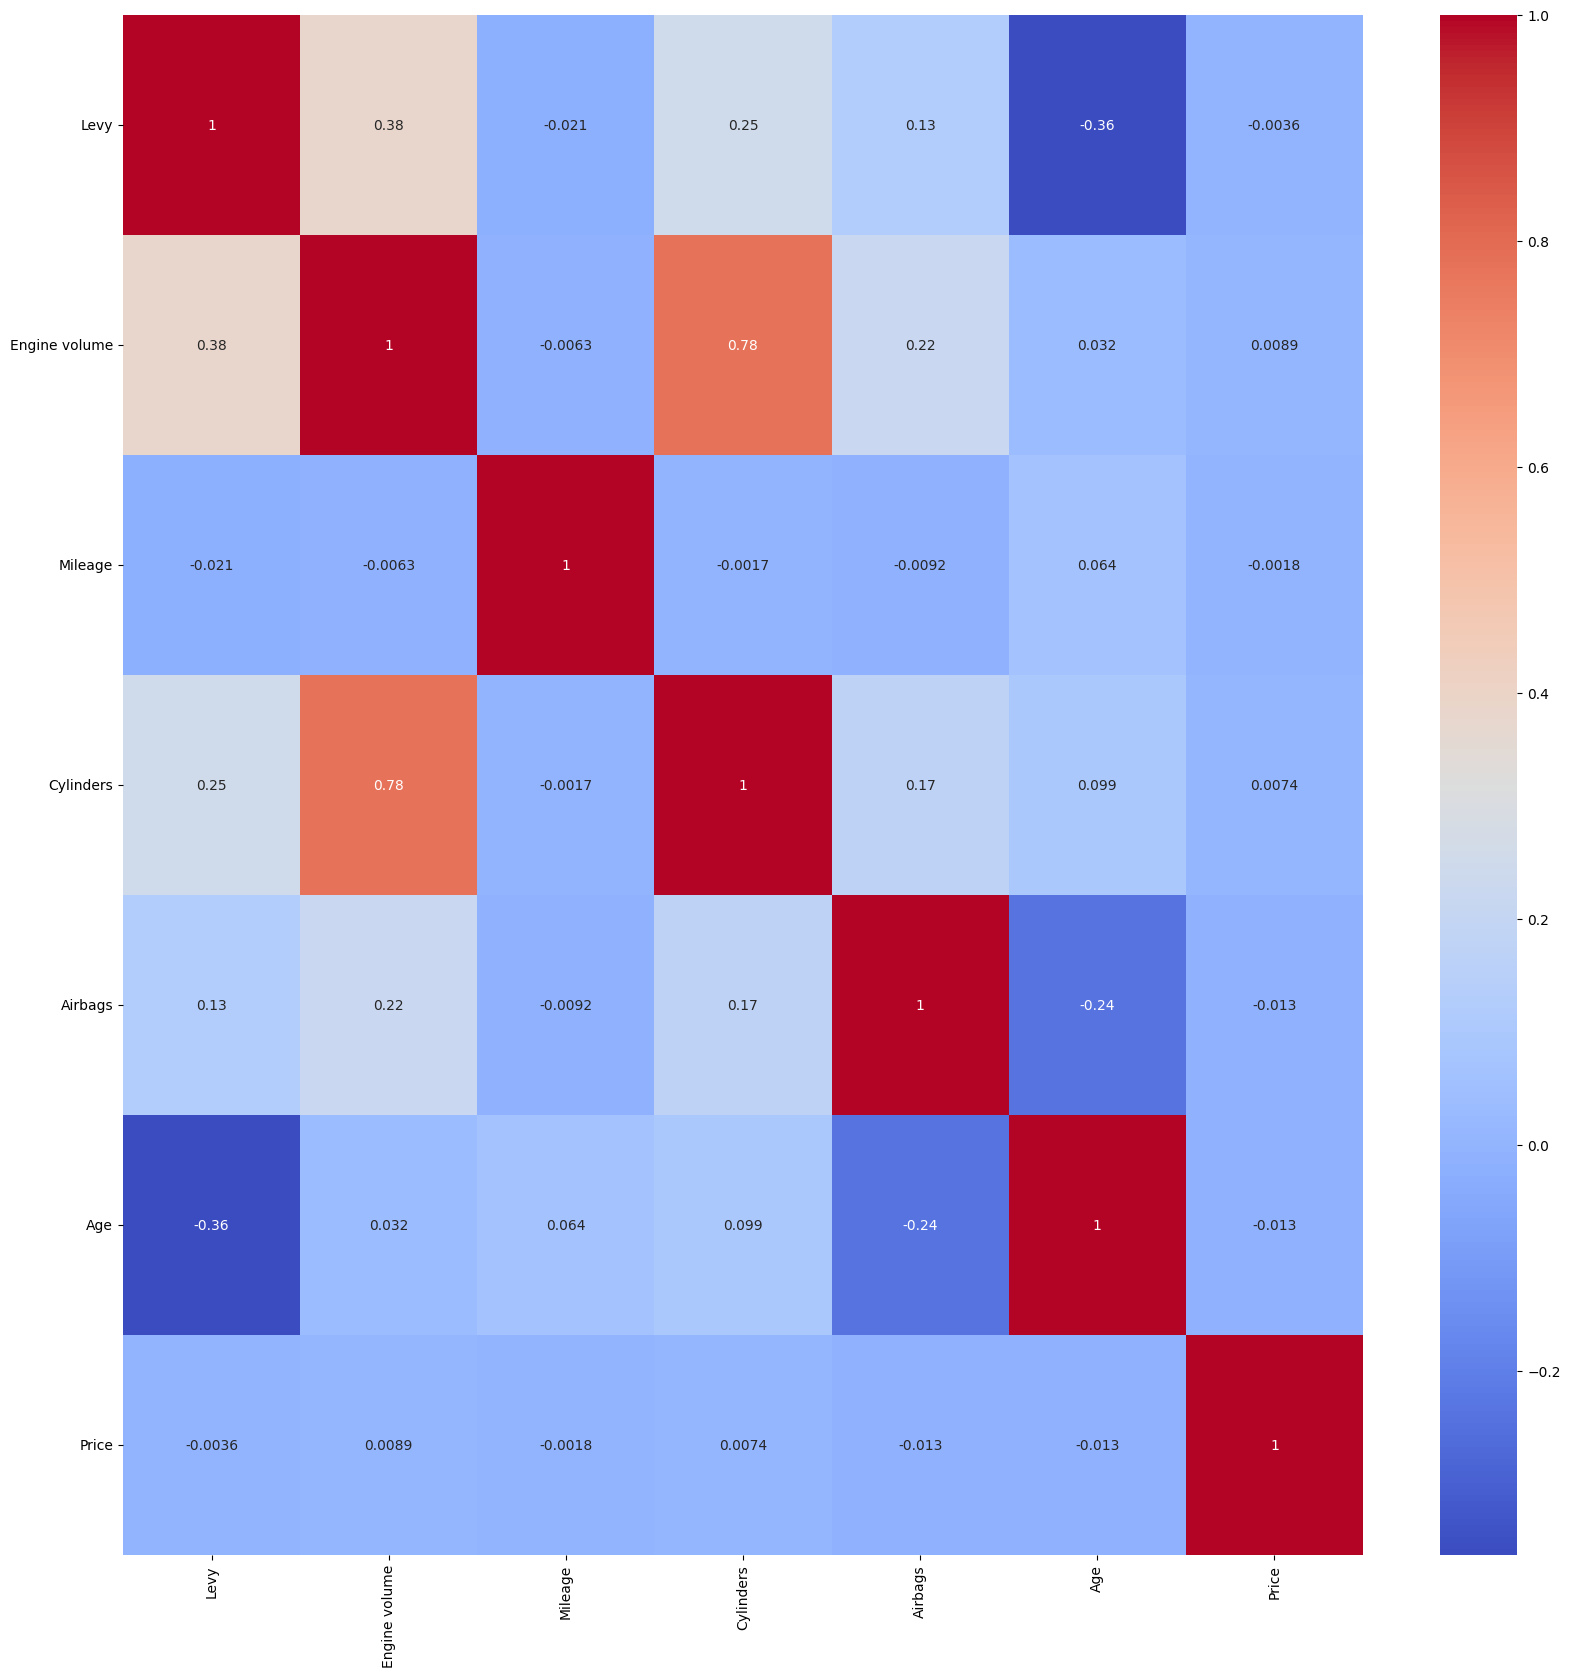

In [19]:
# 3.4 Correlation matrix
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

columns = list(corr_matrix.columns)
columns.remove('Price')
columns.append('Price')
corr_matrix = corr_matrix.loc[columns, columns]

# Create a heatmap from the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, fontsize=10)
# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=10)
plt.show()

**Create and analyse heat map:**

Heat map illustrates the correlation of the feature in pairs through x axis and y axis. The color gradient is helpful in identify strongness and weaknesss of the relationship. Besides that, dataa analyst can also identify patterns and clusters when dealing with numerical variables. 

  

**Top 5 most correlation:**  

Engine volume vs Cylinders (0.7785): Highest correlation which explains that higher engine volume tends to have more cylinders. The correlation is presented in deep red color 

Levy vs Engine volume (0.3774): Cars with larger engine volume tends to have higher levy. The correlation is presented in light red color. It is not as strong as the first pair but still present a positive relationship 

*Levy vs Age (0.3647): Production year contributes in the decision of levy prices. The correlation is presented in pink color, indicates new and mordern cars usually have higher price due to levy*

*Airbags vs Age (0.2369): relationship between production year and airbags as ater production cars will often have more airbags. The correlation is shown in light blue, can considered as weak relationship*

Cylinders vs Airbags (0.1769): low correlation as these two features do not affect each other in predicting car prices; presented in light blue color. 

  

**Top 5 least correlation:** 

Price vs Levy (-0.0037): The correlation is presented in dark blue, very weak correlation. However, this is an error in the dataset and required adjustments because levy does always have a certain influence to car price prediction. 

Mileage vs Levy (-0.0210): The correlation is presented dark blue as these two attributes are irrelevant in the final price of the car. 

Mileage vs Airbags (-0.0092): The correlation suggests almost zero correlation between these features, presented in dark blue as well 

Mileage vs Engine volume (-0.0063): Extreme low value in correlation, the relationship between mileage and engine volume is purposeless in deciding the car price 

Price vs Airbags (-0.0128): This value need to have some adjustments because there is a relationship between these two features. The number of airbags are related to the car manufacturer and it is one of the key features that decide the car value. It should not be display at weak correlation in general. 

These pair of variables displays almost or very weak correlation in car price prediction. 

**Check normality of data before removing outliers**
The main purpose is to Focus on the normality of numeric variables in dataset and two key features: Skewness and Kurtosis. Skewness is the method of measuring the imbalance of distribution in values and Kurtosis is the method of demonstrates the skewness of distribution compared to a certain standard; usually heavy ‘tail’ or light ‘tail’. Besides that, to get a clearer and more accurate point of view, the team also calculate Mean, Median, Standard Deviation and Potential Normal.  

Overall, the airbags is the only features that is approximately normal distributed while other variables showing significant skewness and kurtosis, suggesting outliers, extreme values and asymmetrical distributions that required thoroughly prepare. 

In [20]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable   Skewness     Kurtosis          Mean    Median  \
0           Levy   2.403811    29.584415  6.328865e+02     642.0   
1  Engine volume   2.208051    19.555731  2.306251e+00       2.0   
2        Mileage  38.578517  1572.672121  1.555373e+06  126400.0   
3      Cylinders   2.107707     6.587165  4.580216e+00       4.0   
4        Airbags   0.086344    -1.332103  6.568379e+00       6.0   
5            Age   2.088595    11.450244  1.308576e+01      12.0   

        Std Dev  Potential Normal  
0  5.682737e+02             False  
1  8.775910e-01             False  
2  4.880221e+07             False  
3  1.200223e+00             False  
4  4.322323e+00              True  
5  5.665749e+00             False  


# **EDA on categorical features**

To perfrom the distribution of categorical features based on Exploratory Data Analysis (EDA), we used ‘for loop’ function to concentrate on each specific features with categorical values from the dataset. 

There are 11 charts in total with the size is set to 8x6 and each of them represent the specific categorical features. The library (sns.countplot) is used to create a count plot with the purpose of demonstrating the frequency of each category in a categorical attribute. For example, in the column ‘Model’ (e.g., “RX350”, “Santa FE”) this will show the number of each value appear in the dataset. 

To optimize the distribution of each variables, we labeled the x-axis with the name of the attribute and y-axis is the frequency. The graphs also display with title (e.g., Distribution of Gear box type) 

Overall, the 11 histograms allow the team to detect if the data is imbalanced, extreme values such as one vehicle’s model occupy large number compared to the rest. 

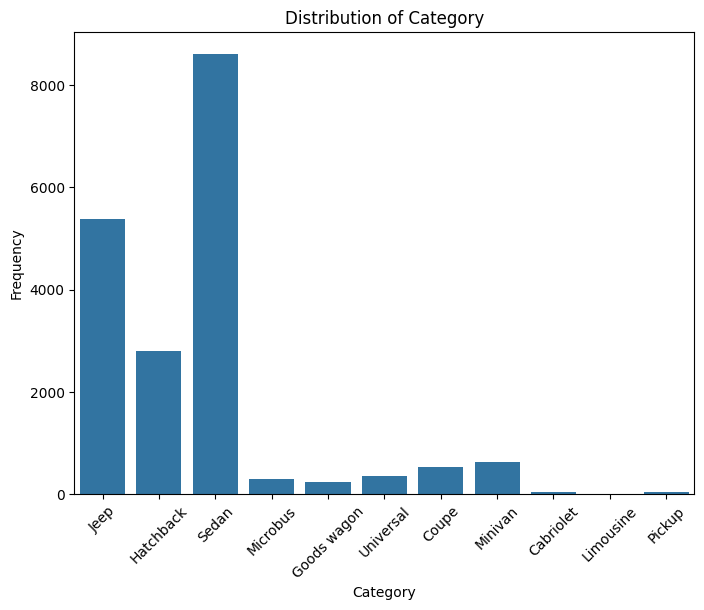

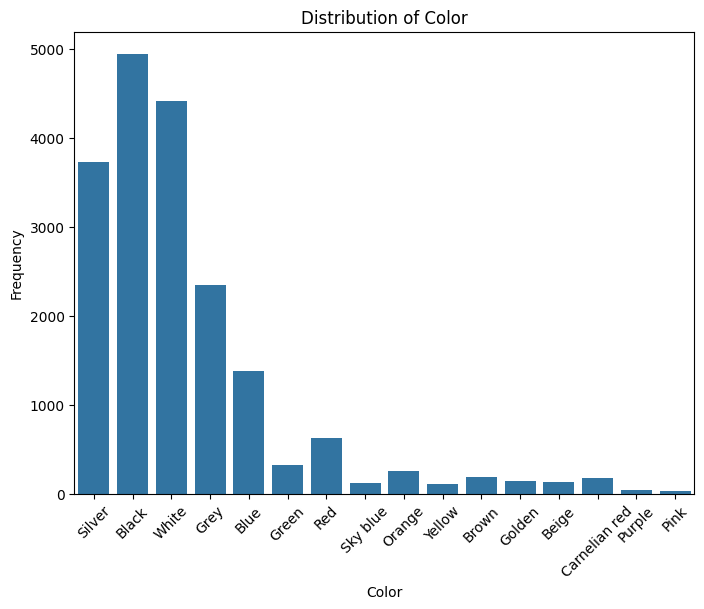

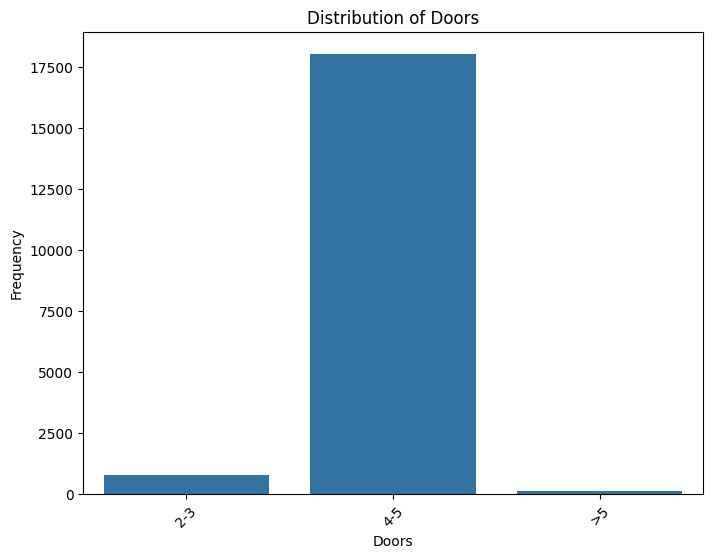

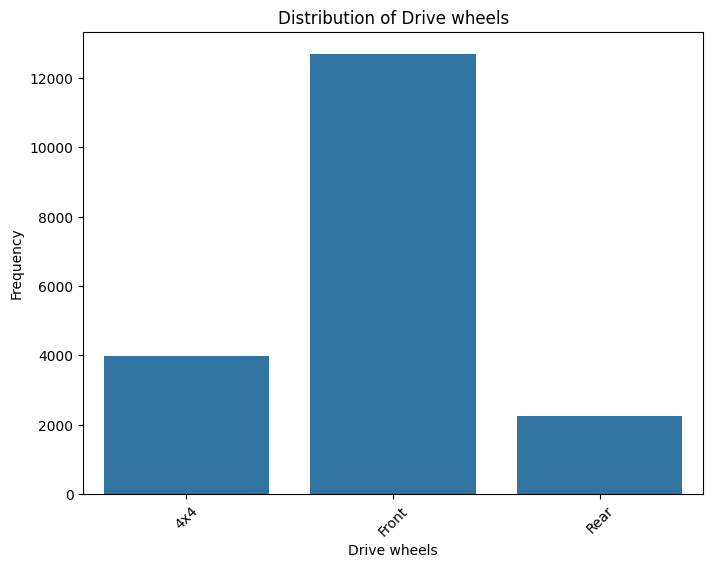

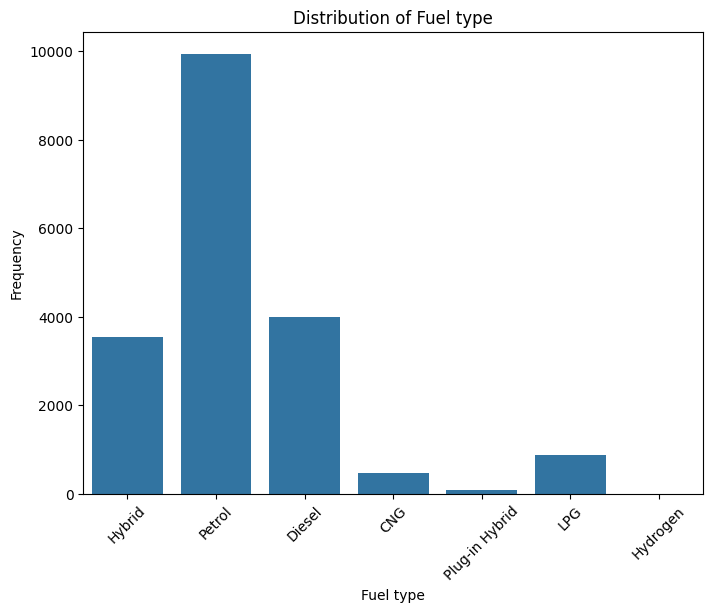

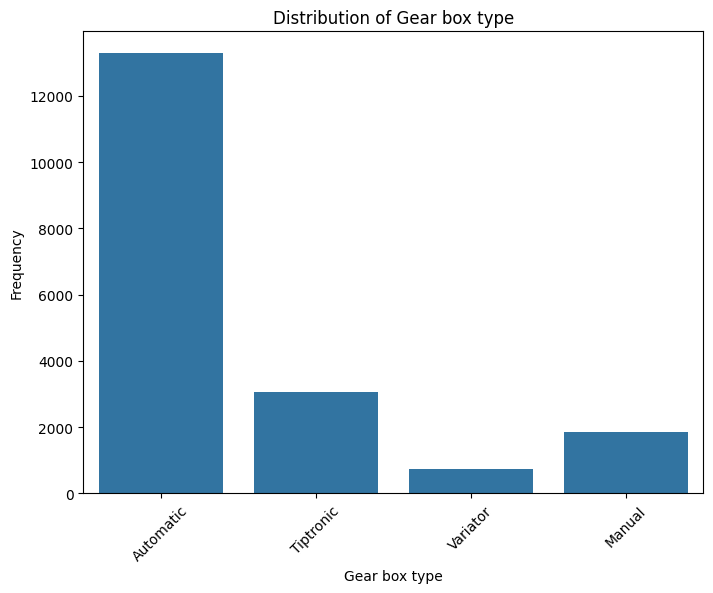

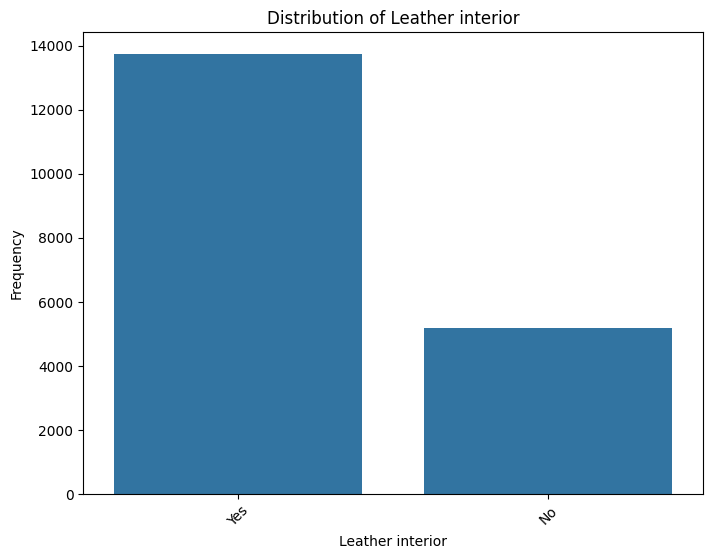

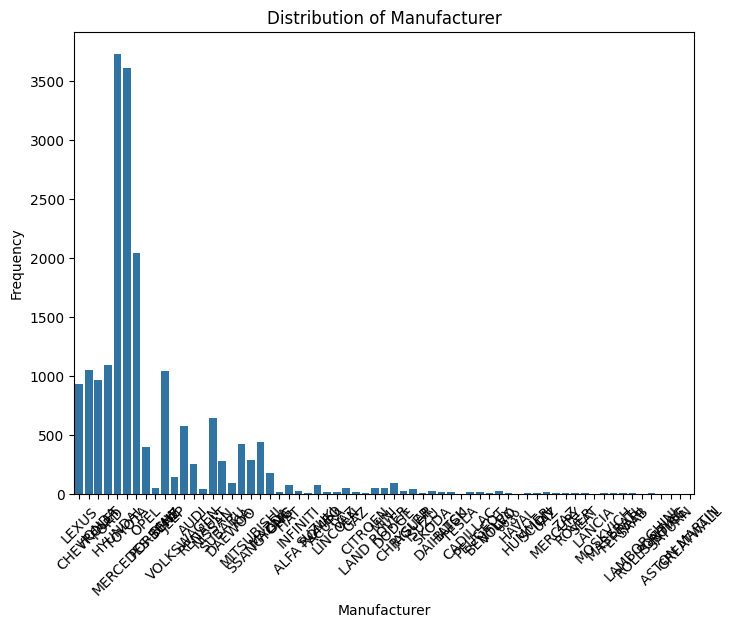

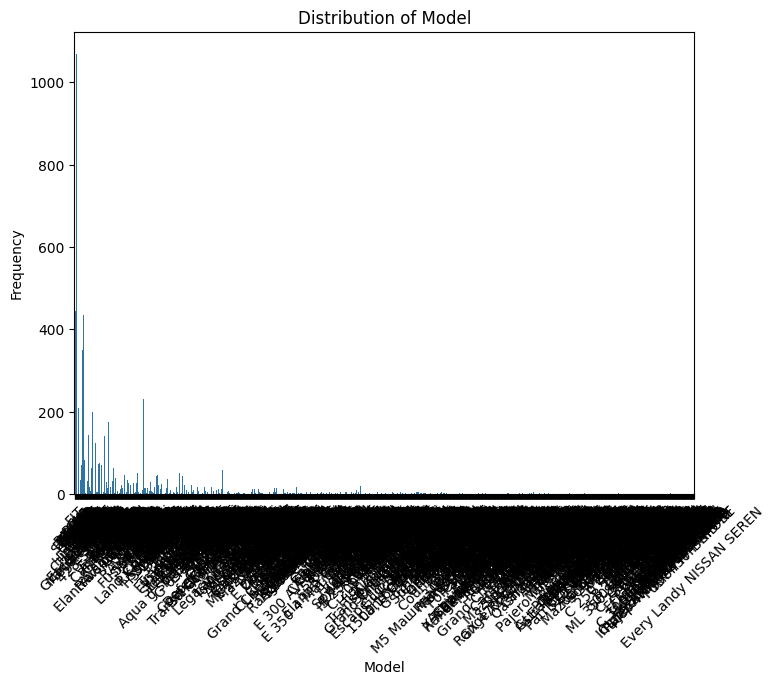

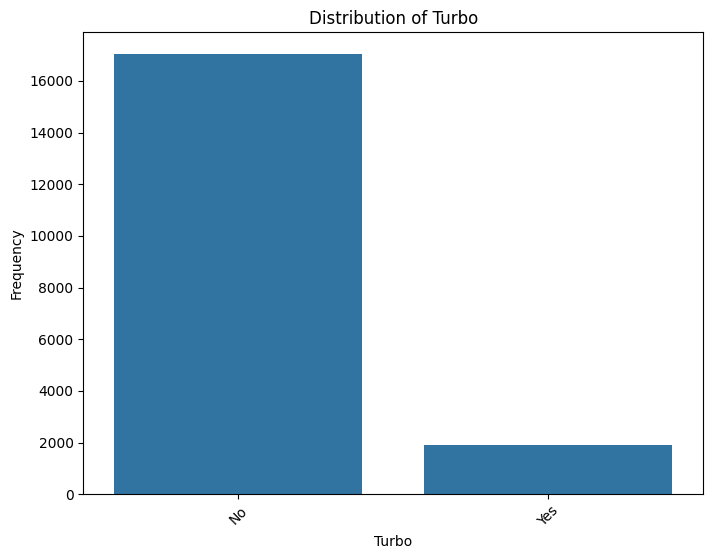

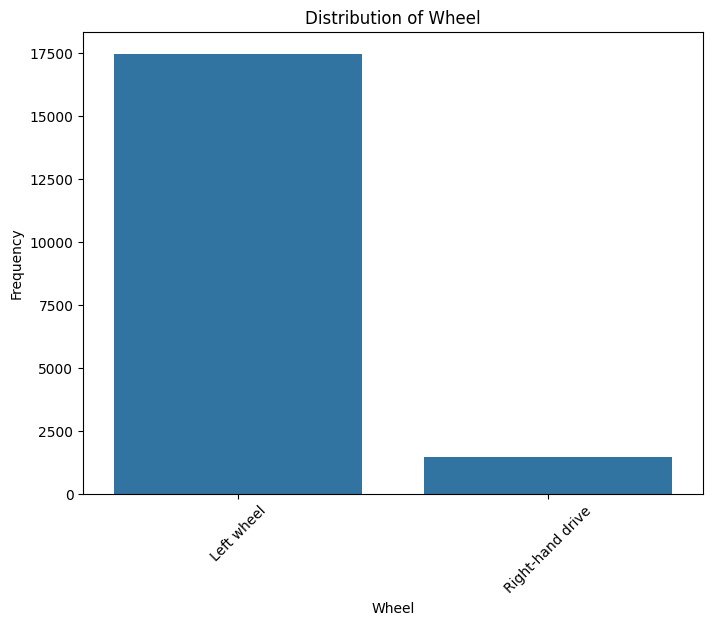

In [21]:
for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=raw_data)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

**Analyse 11 graphs** 

- Distribution of Category Attribute: Sedan appears as the majority of the dataset, followed by Jeeps and Hatchbacks which make the distribution is highly imbalanced. Other categories such as Coupes, and Minivans are much less in quantity. 

- Distribution of Color:  Silver, Black and White are the three most common car colour. Overall, the graph illustrates skew left in the distribution towards neutral colours (Silver, Black and White) and vibrant colours (Red, Blue and Green) are much less frequent. 

- Distribution of Doors: The distribution can be seen as heavily concentrated, which means most of the car’s model are Sedan, Hatchbacks and Jeeps with the number of cars that have 4 to 5 doors majority. 

- Distribution of Drive wheels: ‘4X4’ and ‘Rear’ attributes occupy a small amount while Front drive wheels dominate the dataset. 

- Distribution of Fuel Type: Up to now, gasoline (Petrol) has always been the fuel that accounts for the largest quantity, follow by Diesel and Hybrid. Therefore, CNG and LPG only count for a small amount and Plug-in-Hybrid negligible surplus. 

- Distribution of Gear Box type: The distribution presents that most cars engine in dataset are automatic transmission while manual transmission and tiptronic are less frequent. This features is related to the model’s type as nowadays Sedan cars are mostly automatic gear box type. 

- Distribution of Leather interior: Most cars have leather interiors and more than double the number of cars that do not have. 

- Distribution of Manufacturer: The dataset contains 65 unique manufacturers from all over the world, but the most popular cars production are from Japan, Korea and Germany. The distribution is highly imbalance as the Hyundai represents the majority of the dataset, follow by Toyota and Mercedes-Benz. On the other hand, some manufacturers have very few entries such as Tesla, Pontiac, Saturn or Aston Martin (only 1 car in the dataset).  It is clearly that the graph is skew to the left side. 

- Distribution of Model: The distribution chart of cars model have many similarities in addition to strong correlation to the Manufacturers attributes. This explain why the top five highest variables are: 

	* Prius: 1,083 entries 

	* Sonata: 1,079 entries 

	* Camry: 938 entries 

	* Elantra: 922 entries 

	* E 350: 542 entries 

They are the models from Toyota, Hyundai and Mercedes Benz, significantly more numerous than other models. Luxury cars model from brands like Aston Martin are barely even visible on the chart. 

  

- Distribution of Turbo: The number of cars with turbo is five times higher than the one without it, this is related to the number of Sedan’s model type. Most of the Sedan model doesn’t have turbo because of its higher price in addition to users requirements. 

- Distribution of Wheel: The distribution indicates that most car users are left hand drive, which is popular in European Countries and The US. Right hand drive is common for Asian countries like Japan and Korea. The reason for this disparity distribution might be due to the dataset’s origin and target market 

# **Step 4. PREPARE THE DATA**

**Remove Outliers:**

The team applied the Interquartile Range (IQR) method to detect and remove outliers from the dataset. We set the range between the first quartile (Q1) and the third quartile (Q3) and outliers value is considered as the upper bound and lower bound based on the IQR calculation. With target outcome of less outliers and better distribution model, we calculated the value Q1 (below Q1 - 1.5 * IQR) and Q3 (above Q3 + 1.5 * IQR). Besides that, ‘np.percentile()’ fuction is also used to calculate the 25th percentile (Q1) and the 75th percentile (Q3). It is very important in calculating IQR and define outliers. 

In [22]:
def remove_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - factor * iqr
    upper_bound = Q3 + factor * iqr
    return lower_bound, upper_bound

lower_bound, upper_bound = remove_outliers_iqr(raw_data['Price'], factor=1.5)
price_column = raw_data['Price']

outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers from the DataFrame
raw_data = raw_data[~outliers]


Number of outliers: 1055


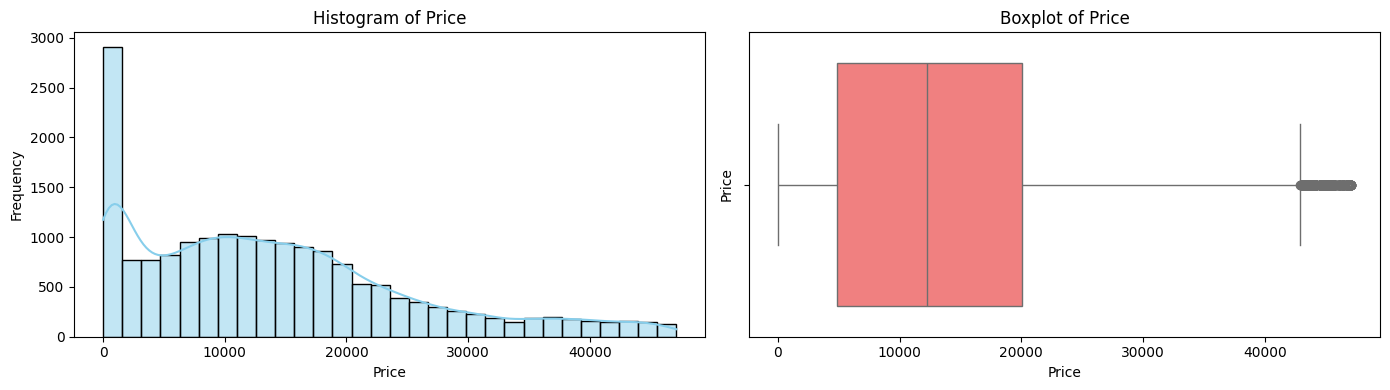

In [23]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram
sns.histplot(raw_data['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=raw_data['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Price')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# List of columns to check for outliers
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags since distro seems normal

# Dictionary to store outlier counts
outlier_counts = {}

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count

raw_data = raw_data[raw_data['Price'] >= 500]

# Iterate over columns, remove outliers, and store counts
for column in columns_to_check:
    raw_data, count = remove_outliers_iqr(raw_data, column)
    outlier_counts[column] = count

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 122
Engine volume: 698
Mileage: 610
Cylinders: 2905


In [25]:
raw_data.info() # after removal

<class 'pandas.core.frame.DataFrame'>
Index: 11901 entries, 2 to 19235
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             11901 non-null  int64   
 1   Levy              11901 non-null  float64 
 2   Manufacturer      11901 non-null  object  
 3   Model             11901 non-null  object  
 4   Category          11901 non-null  object  
 5   Leather interior  11901 non-null  object  
 6   Fuel type         11901 non-null  object  
 7   Engine volume     11901 non-null  float64 
 8   Mileage           11901 non-null  float64 
 9   Cylinders         11901 non-null  float64 
 10  Gear box type     11901 non-null  object  
 11  Drive wheels      11901 non-null  object  
 12  Doors             11901 non-null  category
 13  Wheel             11901 non-null  object  
 14  Color             11901 non-null  object  
 15  Airbags           11901 non-null  int64   
 16  Turbo             11901 non

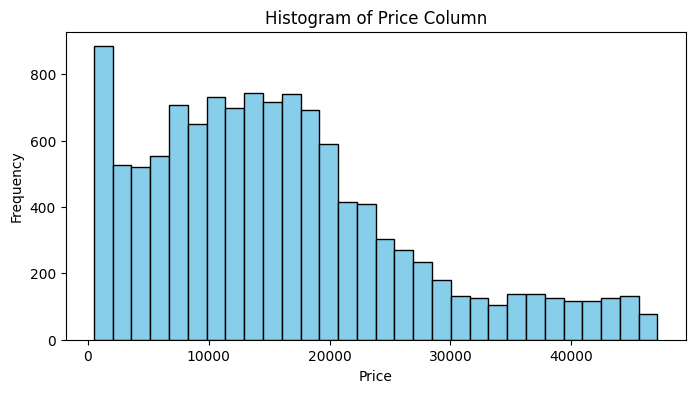

In [26]:
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(8, 4))
plt.hist(raw_data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

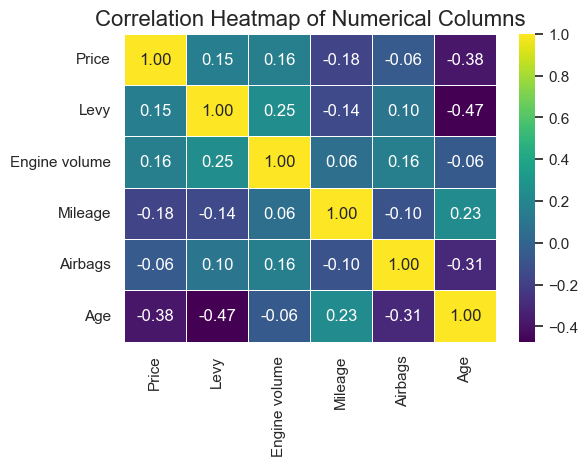

In [27]:
# Select only numerical columns with int64 and float64 data types excluding 'Cylinders'
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap using Seaborn with a different colormap ('viridis')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

# Show the plot
plt.show()


## **Outlier**
THIS IS SAMPLE, REMEMBER TO PARAPHARSE
Leaveoneout encoding for Manufacturer, Model and Category. Rest is one hot encoded

Leave-One-Out Encoding (LOO Encoding) is a technique used in feature engineering for categorical variables, particularly in the context of supervised machine learning. It involves encoding categorical variables by calculating the mean of the target variable for each category, excluding the current instance being encoded. The process is as follows:

For each instance in a category, compute the mean of the target variable for all other instances in the same category. Replace the original categorical value with the computed mean for that instance. This technique aims to provide a more robust encoding by avoiding data leakage, as it calculates the mean by excluding the target value of the instance being encoded.

Advantages of Leave-One-Out Encoding:

Reduced Data Leakage:

LOO Encoding is designed to mitigate data leakage issues that can arise in target encoding, especially when there is a risk of overfitting to the target variable.

Preservation of Information:

By excluding the target value of the instance being encoded, LOO Encoding attempts to provide an unbiased estimate of the category's impact on the target variable.

Effective for Low Cardinality:

Particularly useful for categorical variables with low cardinality, where the number of instances in a category is limited.

Adaptability:

LOO Encoding can be adapted to different models and is applicable in various supervised learning scenarios.

Avoidance of Overfitting:

When used cautiously, LOO Encoding can help avoid overfitting to the target variable by providing a more general encoding strategy.

In [28]:
from category_encoders import LeaveOneOutEncoder

# Select the columns to be encoded
columns_to_encode = ['Manufacturer', 'Model', 'Category']

# Initialize the LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the entire DataFrame
raw_data_encoded = encoder.fit_transform(raw_data[columns_to_encode], raw_data['Price'])

# Concatenate the encoded columns with the original DataFrame
raw_data = pd.concat([raw_data, raw_data_encoded.add_suffix('_LOO')], axis=1)

In [29]:
raw_data.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)

# Identify columns with datatype 'object' or 'category'
columns_to_encode = raw_data.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding with drop_first=True
raw_data_encoded = pd.get_dummies(raw_data, columns=columns_to_encode, drop_first=True)

raw_data_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,0.0,1.3,200000.0,4.0,2,18,12908.312586,13558.956395,12636.230938,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.0,2.5,168966.0,4.0,0,13,14027.698210,12633.530864,21872.319108,...,False,False,False,False,False,False,False,True,False,False
4,11726,446.0,1.3,91901.0,4.0,4,10,12903.804979,13549.482558,12634.802805,...,False,False,False,False,False,True,False,False,False,False
5,39493,891.0,2.0,160931.0,4.0,4,8,20770.377333,30799.427326,21858.522107,...,False,False,False,False,False,False,False,True,False,False
6,1803,761.0,1.8,258909.0,4.0,12,14,14795.485371,13776.765777,12639.151183,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.0,1.7,236000.0,4.0,4,17,6978.162857,7620.406250,10121.333333,...,False,False,False,False,False,False,False,False,False,True
19232,8467,0.0,2.0,300000.0,4.0,5,25,15739.663244,7682.166667,14978.434783,...,False,False,False,False,False,True,False,False,False,True
19233,15681,831.0,2.4,161600.0,4.0,8,13,20778.457414,13670.366306,13961.476260,...,False,False,False,False,True,False,False,False,False,False
19234,26108,836.0,2.0,116365.0,4.0,4,14,20774.919240,27981.279778,21863.668205,...,True,False,False,False,False,False,False,False,False,False


In [30]:
# Loop through columns
for column in raw_data_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if raw_data_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        raw_data_encoded[column] = raw_data_encoded[column].astype(int)

raw_data_encoded



,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,0.0,1.3,200000.0,4.0,2,18,12908.312586,13558.956395,12636.230938,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2.5,168966.0,4.0,0,13,14027.698210,12633.530864,21872.319108,...,0,0,0,0,0,0,0,1,0,0
4,11726,446.0,1.3,91901.0,4.0,4,10,12903.804979,13549.482558,12634.802805,...,0,0,0,0,0,1,0,0,0,0
5,39493,891.0,2.0,160931.0,4.0,4,8,20770.377333,30799.427326,21858.522107,...,0,0,0,0,0,0,0,1,0,0
6,1803,761.0,1.8,258909.0,4.0,12,14,14795.485371,13776.765777,12639.151183,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.0,1.7,236000.0,4.0,4,17,6978.162857,7620.406250,10121.333333,...,0,0,0,0,0,0,0,0,0,1
19232,8467,0.0,2.0,300000.0,4.0,5,25,15739.663244,7682.166667,14978.434783,...,0,0,0,0,0,1,0,0,0,1
19233,15681,831.0,2.4,161600.0,4.0,8,13,20778.457414,13670.366306,13961.476260,...,0,0,0,0,1,0,0,0,0,0
19234,26108,836.0,2.0,116365.0,4.0,4,14,20774.919240,27981.279778,21863.668205,...,1,0,0,0,0,0,0,0,0,0


# Data Preparation

## Helper Functions

In [31]:
from sklearn.metrics import mean_squared_error

def r2score_and_rmse(model, train_data, labels):
    r2score = model.score(train_data, labels)
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse

def store_model(model, model_name=""):
    if model_name == "":
        model_name = type(model).__name__
    joblib.dump(model, 'models/' + model_name + '_model.pkl')

def load_model(model_name):
    model = joblib.load('models/' + model_name + '_model.pkl')

    return model

In [32]:
from sklearn.model_selection import train_test_split

# Separate the target variable (Price) and independent variables
X = raw_data_encoded.drop(columns=['Price','Cylinders'])
y = raw_data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8330, 38)
(8330,)
(3571, 38)
(3571,)


# Model Training

## Linear Regression

In [33]:
new_training = 1  

if new_training: 
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="LinearRegression")
else:
    model = load_model("LinearRegression")

# Analyze performance
print('_____________LINEAR REGRESSION MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________LINEAR REGRESSION MODEL PERFORMANCE_________

 R2 Score (train data): 0.5174912075814619

 RMSE (train data): 7534.5633780436865

 R2 Score (test data): 0.5044360798616403

 RMSE (test data): 7558.572636849269

Predictions:  [32883.9 10212.9 19295.6 19752.9 24849.  25508.9 29790.8 18769.5 27708. ]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Ridge Regression

In [34]:
new_training = 1  

if new_training: 
    model = Ridge(alpha=0.1)
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="Ridge")
else:
    model = load_model("Ridge")

# Analyze performance
print('_____________RIDGE MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RIDGE MODEL PERFORMANCE_________

 R2 Score (train data): 0.517491206691813

 RMSE (train data): 7534.563384989794

 R2 Score (test data): 0.5044377542683517

 RMSE (test data): 7558.559867421423

Predictions:  [32883.7 10212.9 19295.5 19752.8 24848.8 25508.9 29790.7 18769.4 27708.1]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Decision Tree

In [35]:
new_training = 1  

if new_training: 
    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="DecisionTreeRegressor")
else:
    model = load_model("DecisionTreeRegressor")

# Analyze performance
print('_____________DECISION TREE REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________DECISION TREE REGRESSOR PERFORMANCE_________

 R2 Score (train data): 1.0

 RMSE (train data): 0.0

 R2 Score (test data): 0.9692030453856734

 RMSE (test data): 1884.2730540749867

Predictions:  [45633.  6115. 31797. 21009. 21326. 13808. 40224. 22110. 21768.]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Random Forest

In [36]:
new_training = 1  

if new_training: 
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")

# Analyze performance
print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score (train data): 0.9974481375484021

 RMSE (train data): 547.9413878723101

 R2 Score (test data): 0.9834347377090751

 RMSE (test data): 1381.939751414915

Predictions:  [45624.2  6115.3 32586.4 21162.  21326.  13795.  40263.4 22062.7 21758.8]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## XGBoost

In [37]:
new_training = 1

if new_training:
  model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
  model.fit(X_train_scaled, y_train)
  store_model(model, model_name="XGBoost")
else:
  model = load_model("XGBoost")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR XGBOOST_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR XGBOOST_________

 R2 Score (train data): 0.9984489679336548

 RMSE (train data): 427.1838164958757

 R2 Score (test data): 0.9637517333030701

 RMSE (test data): 2044.2479915504157

Predictions:  [45615.9  5869.4 32417.  21553.8 21302.  13528.8 40510.7 22565.3 22073.8]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


## Neural Network

In [38]:
new_training = 1

if new_training:
    # Define the neural network architecture
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.002,  # L2 regularization
        batch_size=32,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=42,
        verbose=True
    )
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="NeuralNetwork")
else:
    model = load_model("NeuralNetwork")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR NEURAL NETWORK_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

Iteration 1, loss = 109170772.97081842
Validation score: 0.512342
Iteration 2, loss = 27161661.57084781
Validation score: 0.574701
Iteration 3, loss = 24843787.88895753
Validation score: 0.599112
Iteration 4, loss = 23538626.34818654
Validation score: 0.618666
_______SCORE FOR NEURAL NETWORK_________

R2 score:  0.608551621866652
RMSE score:  6786.4510914609

 R2 Score (test data): 0.58939699057391

 RMSE (test data): 6880.199243209184

Predictions:  [36283.5 10708.2 20168.1 19989.2 25835.2 23863.3 31787.6 21911.8 27123.9]
Labels:       [45633, 6115, 31797, 21009, 21326, 13808, 40224, 22110, 21768]


/Users/vantai/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [57]:
from sklearn.metrics import make_scorer

# Custom scorer for RMSE
rmse_scorer = make_scorer(root_mean_squared_error)

print('\n____________ K-fold cross validation ____________')

run_new_evaluation = 1

if run_new_evaluation:
    cv = KFold(n_splits=10, shuffle=True, random_state=37)

    # DECISION TREE
    model_name = "DecisionTreeRegressor"
    model = DecisionTreeRegressor(random_state=42)
    
    # Cross-validation scores for RMSE and R²
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'DecisionTreeRegressor RMSE: {np.mean(rmse_scores):.2f}')
    print(f'DecisionTreeRegressor R²: {np.mean(r2_scores):.2f}\n')

    # RANDOM FOREST
    model_name = "RandomForest"
    model = RandomForestRegressor(random_state=42)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'RandomForest RMSE: {np.mean(rmse_scores):.2f}')
    print(f'RandomForest R²: {np.mean(r2_scores):.2f}\n')

    # RIDGE
    model_name = "Ridge"
    model = Ridge(alpha=0.1)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Ridge RMSE: {np.mean(rmse_scores):.2f}')
    print(f'Ridge R²: {np.mean(r2_scores):.2f}\n')

    # LINEAR
    model_name = "Linear"
    model = LinearRegression()

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Linear RMSE: {np.mean(rmse_scores):.2f}')
    print(f'Linear R²: {np.mean(r2_scores):.2f}\n')

    # XGBOOST
    model_name = "XGBoost"
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'XGBoost RMSE: {np.mean(rmse_scores):.2f}')
    print(f'XGBoost R²: {np.mean(r2_scores):.2f}\n')

    # NN
    model_name = "NeuralNetwork"
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50),
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size=32,
        max_iter=30,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=37,
        verbose=True
    )

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'NN RMSE: {np.mean(rmse_scores):.2f}')
    print(f'NN R²: {np.mean(r2_scores):.2f}\n')

else:
    # Load saved RMSE and R² scores for each model
    models = ["DecisionTreeRegressor", "RandomForest", "Ridge", "Linear", "XGBoost", "NeuralNetwork"]

    for model_name in models:
        rmse_scores = joblib.load('saved_objects/' + model_name + '_rmse.pkl')
        r2_scores = joblib.load('saved_objects/' + model_name + '_r2.pkl')
        print(f"\n{model_name} RMSE: {np.mean(rmse_scores):.2f}")
        print(f"{model_name} R²: {np.mean(r2_scores):.2f}\n")



____________ K-fold cross validation ____________
DecisionTreeRegressor RMSE: 1978.88
DecisionTreeRegressor R²: 0.97

RandomForest RMSE: 1512.69
RandomForest R²: 0.98

Ridge RMSE: 7566.41
Ridge R²: 0.51

Linear RMSE: 7566.41
Linear R²: 0.51

XGBoost RMSE: 1695.85
XGBoost R²: 0.97

Iteration 1, loss = 132483569.10292090
Validation score: 0.361462
Iteration 2, loss = 29995303.70966587
Validation score: 0.493018
Iteration 3, loss = 26512966.16336739
Validation score: 0.531565
Iteration 4, loss = 24920660.04981888
Validation score: 0.548592
Iteration 5, loss = 23991057.56238661
Validation score: 0.562586
Iteration 6, loss = 23250221.82470562
Validation score: 0.569161
Iteration 7, loss = 22679184.14713111
Validation score: 0.583520
Iteration 8, loss = 22148189.69081102
Validation score: 0.589471
Iteration 9, loss = 21676271.38695381
Validation score: 0.600250
Iteration 10, loss = 21250226.84741468
Validation score: 0.608488
Iteration 11, loss = 20902466.50793548
Validation score: 0.603353

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131311999.12622121
Validation score: 0.437685
Iteration 2, loss = 29840733.51499474
Validation score: 0.562258
Iteration 3, loss = 26522380.82978583
Validation score: 0.595112
Iteration 4, loss = 25044656.16736261
Validation score: 0.612398
Iteration 5, loss = 24163036.52006670
Validation score: 0.629446
Iteration 6, loss = 23355006.60177647
Validation score: 0.640082
Iteration 7, loss = 22814933.54978986
Validation score: 0.648027
Iteration 8, loss = 22308578.24537658
Validation score: 0.656039
Iteration 9, loss = 21838748.64372399
Validation score: 0.659867
Iteration 10, loss = 21408207.12964674
Validation score: 0.670963
Iteration 11, loss = 21038481.50155197
Validation score: 0.673199
Iteration 12, loss = 20660766.69989550
Validation score: 0.682311
Iteration 13, loss = 20355917.63779914
Validation score: 0.685246
Iteration 14, loss = 19974236.06832852
Validation score: 0.692252
Iteration 15, loss = 19659964.74097678
Validation score: 0.691457
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131731538.33174117
Validation score: 0.335639
Iteration 2, loss = 29487579.12805782
Validation score: 0.489846
Iteration 3, loss = 26215983.93950373
Validation score: 0.527596
Iteration 4, loss = 24764711.36174128
Validation score: 0.548857
Iteration 5, loss = 23801300.20003553
Validation score: 0.568332
Iteration 6, loss = 23028376.23352700
Validation score: 0.576083
Iteration 7, loss = 22468901.89653904
Validation score: 0.585213
Iteration 8, loss = 21924716.78654891
Validation score: 0.593794
Iteration 9, loss = 21458009.28910133
Validation score: 0.596673
Iteration 10, loss = 21040439.70717038
Validation score: 0.601714
Iteration 11, loss = 20686146.91891708
Validation score: 0.609041
Iteration 12, loss = 20301854.14654157
Validation score: 0.615547
Iteration 13, loss = 19948161.11832228
Validation score: 0.616246
Iteration 14, loss = 19677550.23424234
Validation score: 0.622765
Iteration 15, loss = 19335547.55879234
Validation score: 0.624235
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 129865952.06872424
Validation score: 0.395793
Iteration 2, loss = 30030859.01303122
Validation score: 0.544985
Iteration 3, loss = 26621326.75093195
Validation score: 0.577102
Iteration 4, loss = 25096745.90233584
Validation score: 0.598919
Iteration 5, loss = 24007845.32597946
Validation score: 0.614097
Iteration 6, loss = 23353856.00520366
Validation score: 0.618535
Iteration 7, loss = 22746741.53810286
Validation score: 0.630108
Iteration 8, loss = 22179287.81921814
Validation score: 0.637326
Iteration 9, loss = 21674607.78065027
Validation score: 0.642523
Iteration 10, loss = 21329117.82088226
Validation score: 0.646617
Iteration 11, loss = 20899587.43236170
Validation score: 0.652133
Iteration 12, loss = 20555807.70635010
Validation score: 0.655307
Iteration 13, loss = 20242019.73465930
Validation score: 0.662484
Iteration 14, loss = 19917565.23283923
Validation score: 0.664273
Iteration 15, loss = 19597172.54104662
Validation score: 0.669026
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 132805696.51545945
Validation score: 0.409404
Iteration 2, loss = 30045815.04827338
Validation score: 0.527977
Iteration 3, loss = 26556496.52315857
Validation score: 0.555104
Iteration 4, loss = 25003013.34986983
Validation score: 0.573635
Iteration 5, loss = 24003355.37496986
Validation score: 0.588924
Iteration 6, loss = 23264210.28492912
Validation score: 0.590894
Iteration 7, loss = 22701588.45556389
Validation score: 0.602086
Iteration 8, loss = 22137616.28929023
Validation score: 0.608390
Iteration 9, loss = 21728494.64624020
Validation score: 0.611305
Iteration 10, loss = 21313619.17605266
Validation score: 0.623017
Iteration 11, loss = 20884937.56980307
Validation score: 0.628996
Iteration 12, loss = 20512858.73204446
Validation score: 0.633787
Iteration 13, loss = 20203696.43339590
Validation score: 0.631843
Iteration 14, loss = 19883973.85526050
Validation score: 0.645009
Iteration 15, loss = 19562763.78316088
Validation score: 0.648417
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 132469147.34594198
Validation score: 0.467693
Iteration 2, loss = 30357582.58876020
Validation score: 0.590329
Iteration 3, loss = 26801329.34714736
Validation score: 0.622109
Iteration 4, loss = 25251761.85637940
Validation score: 0.639233
Iteration 5, loss = 24284811.51338097
Validation score: 0.652478
Iteration 6, loss = 23524348.06548415
Validation score: 0.660772
Iteration 7, loss = 22851620.95706682
Validation score: 0.666161
Iteration 8, loss = 22346856.39494165
Validation score: 0.675646
Iteration 9, loss = 21833962.29031928
Validation score: 0.679209
Iteration 10, loss = 21456234.61809148
Validation score: 0.685609
Iteration 11, loss = 21059040.35083758
Validation score: 0.689346
Iteration 12, loss = 20645135.08593544
Validation score: 0.694932
Iteration 13, loss = 20252881.11852928
Validation score: 0.697419
Iteration 14, loss = 19931854.89644410
Validation score: 0.702829
Iteration 15, loss = 19607353.06199508
Validation score: 0.706147
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131757988.04938747
Validation score: 0.360693
Iteration 2, loss = 29732448.34133151
Validation score: 0.513105
Iteration 3, loss = 26294591.77270094
Validation score: 0.541005
Iteration 4, loss = 24847148.80335403
Validation score: 0.565588
Iteration 5, loss = 23813284.36013883
Validation score: 0.571807
Iteration 6, loss = 23054053.32872954
Validation score: 0.586659
Iteration 7, loss = 22454530.66019700
Validation score: 0.585252
Iteration 8, loss = 21934216.08905036
Validation score: 0.600608
Iteration 9, loss = 21470367.87669739
Validation score: 0.599412
Iteration 10, loss = 21037234.88682853
Validation score: 0.607512
Iteration 11, loss = 20674237.74873375
Validation score: 0.616577
Iteration 12, loss = 20294144.15881773
Validation score: 0.620614
Iteration 13, loss = 19976734.92477793
Validation score: 0.626694
Iteration 14, loss = 19595674.91700700
Validation score: 0.631225
Iteration 15, loss = 19396824.45108049
Validation score: 0.641515
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 133335354.80331650
Validation score: 0.384734
Iteration 2, loss = 30130367.25790988
Validation score: 0.533194
Iteration 3, loss = 26640303.08779164
Validation score: 0.564310
Iteration 4, loss = 25069093.36480322
Validation score: 0.584936
Iteration 5, loss = 24124441.24599452
Validation score: 0.595746
Iteration 6, loss = 23375486.81317601
Validation score: 0.600634
Iteration 7, loss = 22675893.00178346
Validation score: 0.616700
Iteration 8, loss = 22188819.70042406
Validation score: 0.624650
Iteration 9, loss = 21710946.42761355
Validation score: 0.633731
Iteration 10, loss = 21229746.60327902
Validation score: 0.637282
Iteration 11, loss = 20855605.08391497
Validation score: 0.643865
Iteration 12, loss = 20484682.60504852
Validation score: 0.648293
Iteration 13, loss = 20162206.82726841
Validation score: 0.655135
Iteration 14, loss = 19798827.41826606
Validation score: 0.660181
Iteration 15, loss = 19467892.55265774
Validation score: 0.664265
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 132724538.75748405
Validation score: 0.429088
Iteration 2, loss = 29575837.88474880
Validation score: 0.551736
Iteration 3, loss = 26122057.21567121
Validation score: 0.589426
Iteration 4, loss = 24638624.43915805
Validation score: 0.609219
Iteration 5, loss = 23745679.37988400
Validation score: 0.621779
Iteration 6, loss = 23021235.46841699
Validation score: 0.629609
Iteration 7, loss = 22401055.75036904
Validation score: 0.642610
Iteration 8, loss = 21886278.53412374
Validation score: 0.654769
Iteration 9, loss = 21447472.91115541
Validation score: 0.663092
Iteration 10, loss = 21038114.64338792
Validation score: 0.666778
Iteration 11, loss = 20653998.81868177
Validation score: 0.671471
Iteration 12, loss = 20293236.79957823
Validation score: 0.676542
Iteration 13, loss = 19979105.37767764
Validation score: 0.682761
Iteration 14, loss = 19647814.52603529
Validation score: 0.688680
Iteration 15, loss = 19407367.01012893
Validation score: 0.691799
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131313475.49000062
Validation score: 0.402385
Iteration 2, loss = 29249218.57561372
Validation score: 0.536561
Iteration 3, loss = 25875962.83968159
Validation score: 0.570652
Iteration 4, loss = 24488744.18885420
Validation score: 0.587967
Iteration 5, loss = 23488138.98981864
Validation score: 0.596929
Iteration 6, loss = 22763465.88534123
Validation score: 0.612575
Iteration 7, loss = 22128899.81966476
Validation score: 0.619559
Iteration 8, loss = 21649451.56430823
Validation score: 0.626941
Iteration 9, loss = 21128761.78254373
Validation score: 0.633504
Iteration 10, loss = 20707631.75824146
Validation score: 0.640024
Iteration 11, loss = 20280442.85450787
Validation score: 0.642228
Iteration 12, loss = 19908869.48865338
Validation score: 0.646754
Iteration 13, loss = 19545641.52335385
Validation score: 0.648563
Iteration 14, loss = 19247266.55755601
Validation score: 0.654083
Iteration 15, loss = 18936908.96711243
Validation score: 0.660908
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 132483569.10292090
Validation score: 0.361462
Iteration 2, loss = 29995303.70966587
Validation score: 0.493018
Iteration 3, loss = 26512966.16336739
Validation score: 0.531565
Iteration 4, loss = 24920660.04981888
Validation score: 0.548592
Iteration 5, loss = 23991057.56238661
Validation score: 0.562586
Iteration 6, loss = 23250221.82470562
Validation score: 0.569161
Iteration 7, loss = 22679184.14713111
Validation score: 0.583520
Iteration 8, loss = 22148189.69081102
Validation score: 0.589471
Iteration 9, loss = 21676271.38695381
Validation score: 0.600250
Iteration 10, loss = 21250226.84741468
Validation score: 0.608488
Iteration 11, loss = 20902466.50793548
Validation score: 0.603353
Iteration 12, loss = 20470255.22300756
Validation score: 0.617400
Iteration 13, loss = 20093934.19139067
Validation score: 0.629420
Iteration 14, loss = 19798658.48602767
Validation score: 0.633665
Iteration 15, loss = 19425079.79293555
Validation score: 0.640101
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131311999.12622121
Validation score: 0.437685
Iteration 2, loss = 29840733.51499474
Validation score: 0.562258
Iteration 3, loss = 26522380.82978583
Validation score: 0.595112
Iteration 4, loss = 25044656.16736261
Validation score: 0.612398
Iteration 5, loss = 24163036.52006670
Validation score: 0.629446
Iteration 6, loss = 23355006.60177647
Validation score: 0.640082
Iteration 7, loss = 22814933.54978986
Validation score: 0.648027
Iteration 8, loss = 22308578.24537658
Validation score: 0.656039
Iteration 9, loss = 21838748.64372399
Validation score: 0.659867
Iteration 10, loss = 21408207.12964674
Validation score: 0.670963
Iteration 11, loss = 21038481.50155197
Validation score: 0.673199
Iteration 12, loss = 20660766.69989550
Validation score: 0.682311
Iteration 13, loss = 20355917.63779914
Validation score: 0.685246
Iteration 14, loss = 19974236.06832852
Validation score: 0.692252
Iteration 15, loss = 19659964.74097678
Validation score: 0.691457
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131731538.33174117
Validation score: 0.335639
Iteration 2, loss = 29487579.12805782
Validation score: 0.489846
Iteration 3, loss = 26215983.93950373
Validation score: 0.527596
Iteration 4, loss = 24764711.36174128
Validation score: 0.548857
Iteration 5, loss = 23801300.20003553
Validation score: 0.568332
Iteration 6, loss = 23028376.23352700
Validation score: 0.576083
Iteration 7, loss = 22468901.89653904
Validation score: 0.585213
Iteration 8, loss = 21924716.78654891
Validation score: 0.593794
Iteration 9, loss = 21458009.28910133
Validation score: 0.596673
Iteration 10, loss = 21040439.70717038
Validation score: 0.601714
Iteration 11, loss = 20686146.91891708
Validation score: 0.609041
Iteration 12, loss = 20301854.14654157
Validation score: 0.615547
Iteration 13, loss = 19948161.11832228
Validation score: 0.616246
Iteration 14, loss = 19677550.23424234
Validation score: 0.622765
Iteration 15, loss = 19335547.55879234
Validation score: 0.624235
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 129865952.06872424
Validation score: 0.395793
Iteration 2, loss = 30030859.01303122
Validation score: 0.544985
Iteration 3, loss = 26621326.75093195
Validation score: 0.577102
Iteration 4, loss = 25096745.90233584
Validation score: 0.598919
Iteration 5, loss = 24007845.32597946
Validation score: 0.614097
Iteration 6, loss = 23353856.00520366
Validation score: 0.618535
Iteration 7, loss = 22746741.53810286
Validation score: 0.630108
Iteration 8, loss = 22179287.81921814
Validation score: 0.637326
Iteration 9, loss = 21674607.78065027
Validation score: 0.642523
Iteration 10, loss = 21329117.82088226
Validation score: 0.646617
Iteration 11, loss = 20899587.43236170
Validation score: 0.652133
Iteration 12, loss = 20555807.70635010
Validation score: 0.655307
Iteration 13, loss = 20242019.73465930
Validation score: 0.662484
Iteration 14, loss = 19917565.23283923
Validation score: 0.664273
Iteration 15, loss = 19597172.54104662
Validation score: 0.669026
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 132805696.51545945
Validation score: 0.409404
Iteration 2, loss = 30045815.04827338
Validation score: 0.527977
Iteration 3, loss = 26556496.52315857
Validation score: 0.555104
Iteration 4, loss = 25003013.34986983
Validation score: 0.573635
Iteration 5, loss = 24003355.37496986
Validation score: 0.588924
Iteration 6, loss = 23264210.28492912
Validation score: 0.590894
Iteration 7, loss = 22701588.45556389
Validation score: 0.602086
Iteration 8, loss = 22137616.28929023
Validation score: 0.608390
Iteration 9, loss = 21728494.64624020
Validation score: 0.611305
Iteration 10, loss = 21313619.17605266
Validation score: 0.623017
Iteration 11, loss = 20884937.56980307
Validation score: 0.628996
Iteration 12, loss = 20512858.73204446
Validation score: 0.633787
Iteration 13, loss = 20203696.43339590
Validation score: 0.631843
Iteration 14, loss = 19883973.85526050
Validation score: 0.645009
Iteration 15, loss = 19562763.78316088
Validation score: 0.648417
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 132469147.34594198
Validation score: 0.467693
Iteration 2, loss = 30357582.58876020
Validation score: 0.590329
Iteration 3, loss = 26801329.34714736
Validation score: 0.622109
Iteration 4, loss = 25251761.85637940
Validation score: 0.639233
Iteration 5, loss = 24284811.51338097
Validation score: 0.652478
Iteration 6, loss = 23524348.06548415
Validation score: 0.660772
Iteration 7, loss = 22851620.95706682
Validation score: 0.666161
Iteration 8, loss = 22346856.39494165
Validation score: 0.675646
Iteration 9, loss = 21833962.29031928
Validation score: 0.679209
Iteration 10, loss = 21456234.61809148
Validation score: 0.685609
Iteration 11, loss = 21059040.35083758
Validation score: 0.689346
Iteration 12, loss = 20645135.08593544
Validation score: 0.694932
Iteration 13, loss = 20252881.11852928
Validation score: 0.697419
Iteration 14, loss = 19931854.89644410
Validation score: 0.702829
Iteration 15, loss = 19607353.06199508
Validation score: 0.706147
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131757988.04938747
Validation score: 0.360693
Iteration 2, loss = 29732448.34133151
Validation score: 0.513105
Iteration 3, loss = 26294591.77270094
Validation score: 0.541005
Iteration 4, loss = 24847148.80335403
Validation score: 0.565588
Iteration 5, loss = 23813284.36013883
Validation score: 0.571807
Iteration 6, loss = 23054053.32872954
Validation score: 0.586659
Iteration 7, loss = 22454530.66019700
Validation score: 0.585252
Iteration 8, loss = 21934216.08905036
Validation score: 0.600608
Iteration 9, loss = 21470367.87669739
Validation score: 0.599412
Iteration 10, loss = 21037234.88682853
Validation score: 0.607512
Iteration 11, loss = 20674237.74873375
Validation score: 0.616577
Iteration 12, loss = 20294144.15881773
Validation score: 0.620614
Iteration 13, loss = 19976734.92477793
Validation score: 0.626694
Iteration 14, loss = 19595674.91700700
Validation score: 0.631225
Iteration 15, loss = 19396824.45108049
Validation score: 0.641515
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 133335354.80331650
Validation score: 0.384734
Iteration 2, loss = 30130367.25790988
Validation score: 0.533194
Iteration 3, loss = 26640303.08779164
Validation score: 0.564310
Iteration 4, loss = 25069093.36480322
Validation score: 0.584936
Iteration 5, loss = 24124441.24599452
Validation score: 0.595746
Iteration 6, loss = 23375486.81317601
Validation score: 0.600634
Iteration 7, loss = 22675893.00178346
Validation score: 0.616700
Iteration 8, loss = 22188819.70042406
Validation score: 0.624650
Iteration 9, loss = 21710946.42761355
Validation score: 0.633731
Iteration 10, loss = 21229746.60327902
Validation score: 0.637282
Iteration 11, loss = 20855605.08391497
Validation score: 0.643865
Iteration 12, loss = 20484682.60504852
Validation score: 0.648293
Iteration 13, loss = 20162206.82726841
Validation score: 0.655135
Iteration 14, loss = 19798827.41826606
Validation score: 0.660181
Iteration 15, loss = 19467892.55265774
Validation score: 0.664265
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 132724538.75748405
Validation score: 0.429088
Iteration 2, loss = 29575837.88474880
Validation score: 0.551736
Iteration 3, loss = 26122057.21567121
Validation score: 0.589426
Iteration 4, loss = 24638624.43915805
Validation score: 0.609219
Iteration 5, loss = 23745679.37988400
Validation score: 0.621779
Iteration 6, loss = 23021235.46841699
Validation score: 0.629609
Iteration 7, loss = 22401055.75036904
Validation score: 0.642610
Iteration 8, loss = 21886278.53412374
Validation score: 0.654769
Iteration 9, loss = 21447472.91115541
Validation score: 0.663092
Iteration 10, loss = 21038114.64338792
Validation score: 0.666778
Iteration 11, loss = 20653998.81868177
Validation score: 0.671471
Iteration 12, loss = 20293236.79957823
Validation score: 0.676542
Iteration 13, loss = 19979105.37767764
Validation score: 0.682761
Iteration 14, loss = 19647814.52603529
Validation score: 0.688680
Iteration 15, loss = 19407367.01012893
Validation score: 0.691799
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 131313475.49000062
Validation score: 0.402385
Iteration 2, loss = 29249218.57561372
Validation score: 0.536561
Iteration 3, loss = 25875962.83968159
Validation score: 0.570652
Iteration 4, loss = 24488744.18885420
Validation score: 0.587967
Iteration 5, loss = 23488138.98981864
Validation score: 0.596929
Iteration 6, loss = 22763465.88534123
Validation score: 0.612575
Iteration 7, loss = 22128899.81966476
Validation score: 0.619559
Iteration 8, loss = 21649451.56430823
Validation score: 0.626941
Iteration 9, loss = 21128761.78254373
Validation score: 0.633504
Iteration 10, loss = 20707631.75824146
Validation score: 0.640024
Iteration 11, loss = 20280442.85450787
Validation score: 0.642228
Iteration 12, loss = 19908869.48865338
Validation score: 0.646754
Iteration 13, loss = 19545641.52335385
Validation score: 0.648563
Iteration 14, loss = 19247266.55755601
Validation score: 0.654083
Iteration 15, loss = 18936908.96711243
Validation score: 0.660908
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
from sklearn.model_selection import GridSearchCV

# Adjust the param_grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 150, 200],       # Number of trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the grid search model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
